# [뱀](https://www.acmicpc.net/problem/3190)

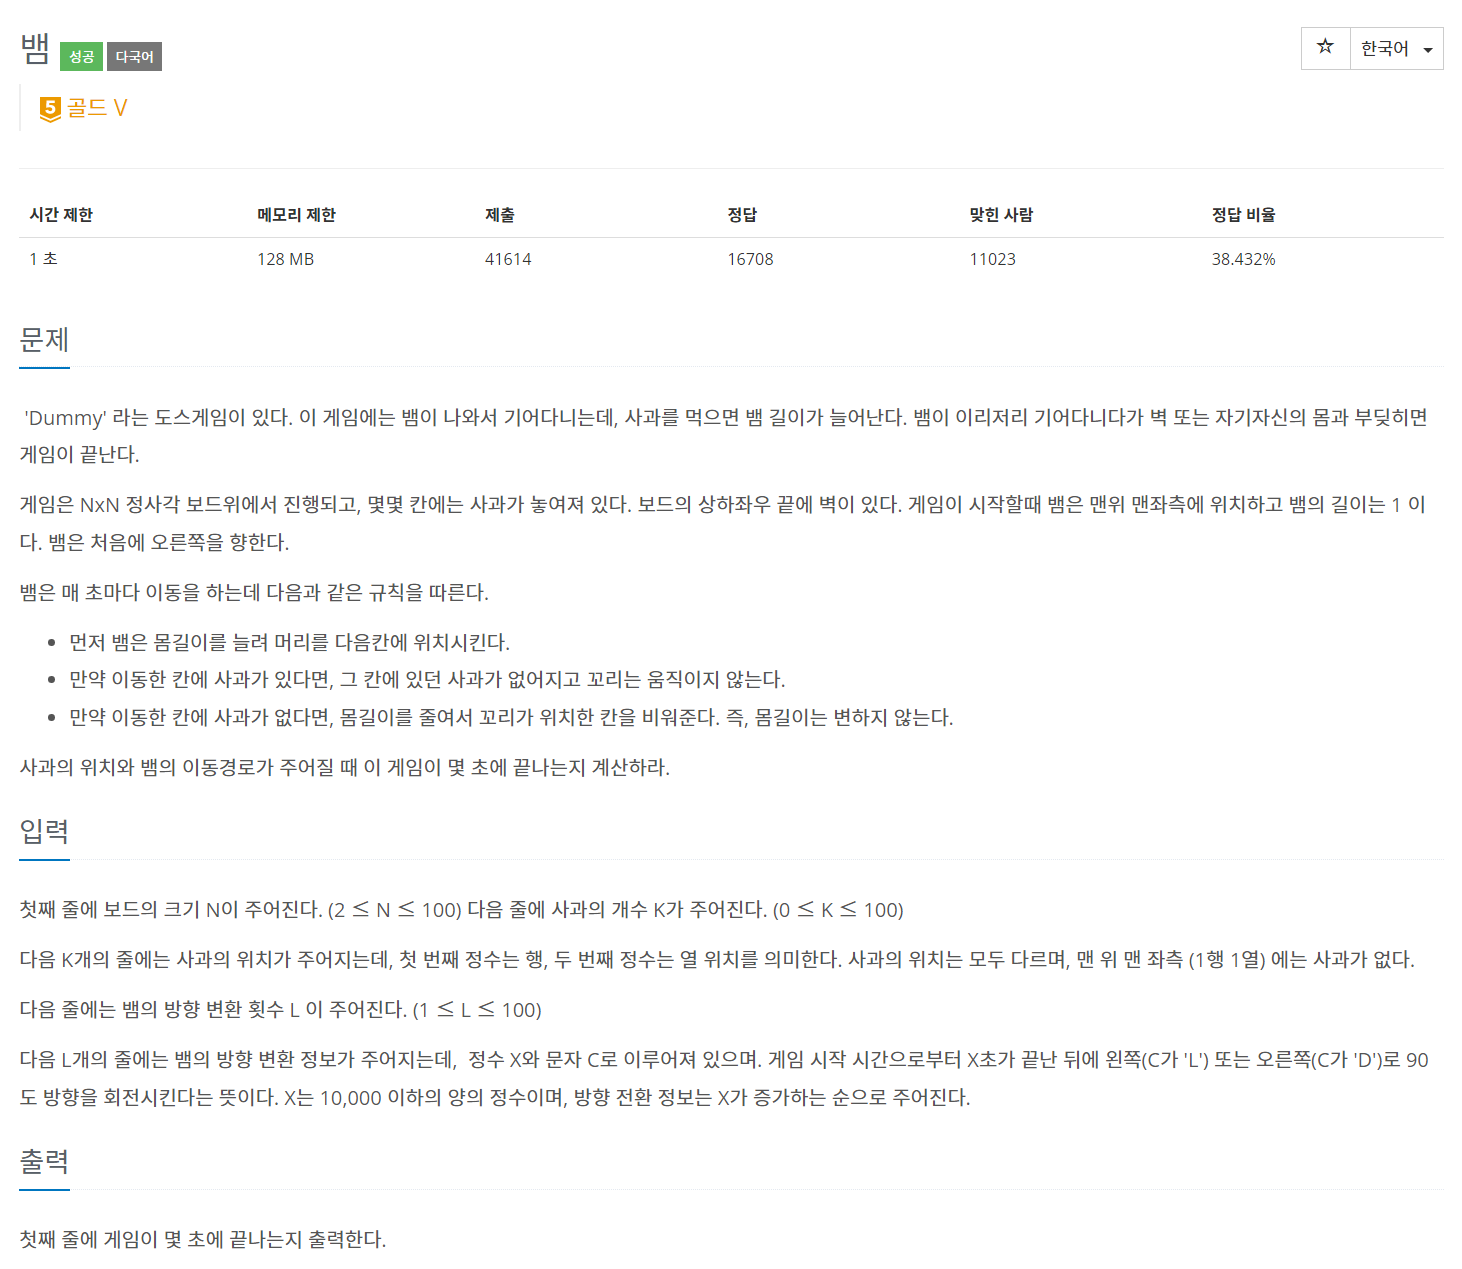

<!-- ![](image/3190.png) -->
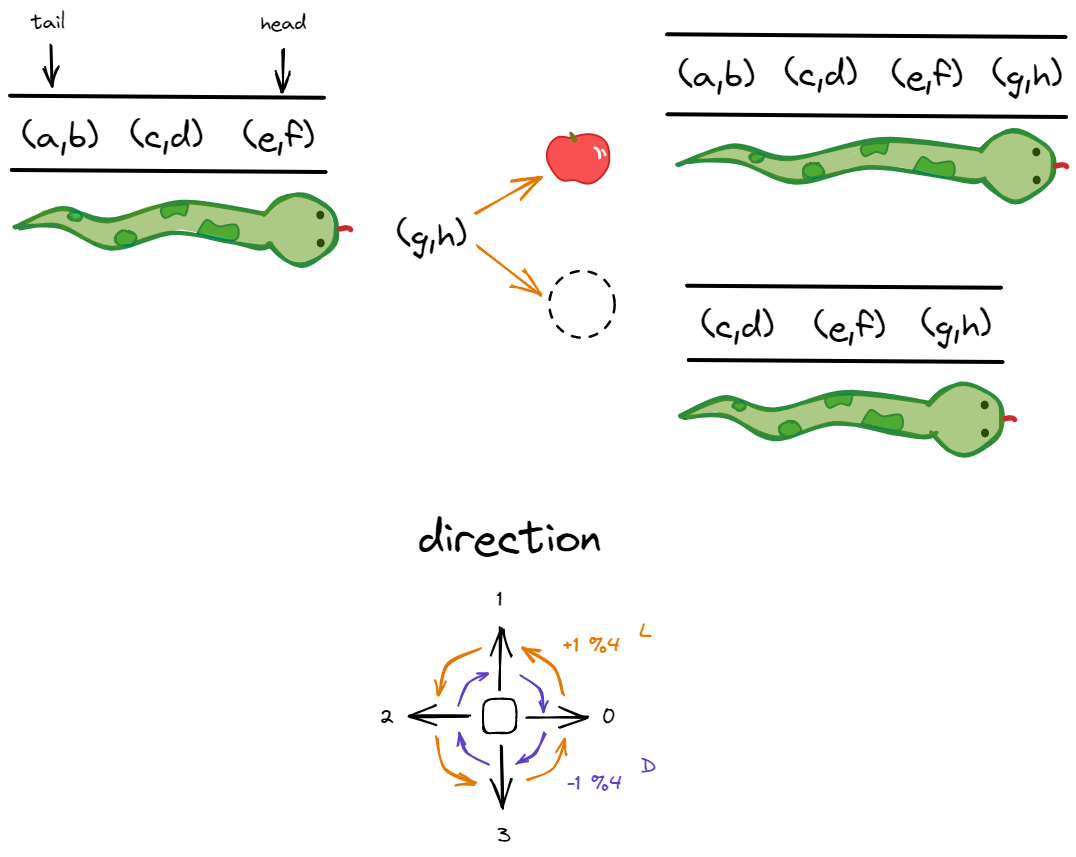

In [ ]:
from collections import deque
import sys

In [ ]:
input = sys.stdin.readline

In [ ]:
n = int(input())
board = [[0]*n for _ in range(n)]
visited = [[False]*n for _ in range(n)]

In [ ]:
for _ in range(int(input())): # 사과 위치 받기
    i, j = map(int, input().split())
    i -= 1
    j -= 1
    board[i][j] = 1

In [ ]:
dir = [[0, 1], [-1, 0], [0, -1], [1, 0]]  # 동북서남

dt = [0]*(10000+1)  # idx초에서의 이동방향

#### 매 초마다 이동방향을 미리 구해놓는다

In [ ]:
for _ in range(int(input())):
    x, c = input().rstrip().split()  # 만약 x가 3이면 이때의 c는 4초에서의 이동방향에 영향을 끼친다.
    if c == 'L':  # 왼쪽방향 회전
        dt[int(x)] = 1
    else:
        dt[int(x)] = -1

for i in range(1, len(dt)):  # 미리 이동방향 구해놓기
    dt[i] = (dt[i-1]+dt[i]) % 4

In [ ]:
i = 0
q = deque()
q.append((0, 0))
visited[0][0] = True
while True:
    x, y = q[-1]
    k = i if i < len(dt) else len(dt)-1
    nx, ny = x+dir[dt[k]][0], y + dir[dt[k]][1]
    if 0 <= nx < n and 0 <= ny < n and not visited[nx][ny]:
        visited[nx][ny] = True
        q.append((nx, ny))
        if board[nx][ny] == 0:  # 사과가 없으면
            visited[q[0][0]][q[0][1]] = False
            q.popleft()
        else:
            board[nx][ny] = 0
    else:
        break
    i += 1

print(i+1)